In [1]:
# importing packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# loding the data
df = pd.read_csv('Downloads/Concretedata.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# since name of the columns are huge converting them into short names
df.columns=['CC','BFS','FA','WC','SPC','CA','FAC','Age','CCS']

In [5]:
df.head()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# understanding the data
df.shape

(1030, 9)

In [7]:
## checking if any of the values are null
df.isnull().sum()

CC     0
BFS    0
FA     0
WC     0
SPC    0
CA     0
FAC    0
Age    0
CCS    0
dtype: int64

In [8]:
# there are 1030 instance and 9 features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1030 non-null   float64
 1   BFS     1030 non-null   float64
 2   FA      1030 non-null   float64
 3   WC      1030 non-null   float64
 4   SPC     1030 non-null   float64
 5   CA      1030 non-null   float64
 6   FAC     1030 non-null   float64
 7   Age     1030 non-null   int64  
 8   CCS     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


We can see that there all the 9 columns in the data are numerical

In [10]:
## understanding the 5 point summary of the data
df.describe()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
## checking the relationship between the feature variables
df.corr()

,CC,BFS,FA,WC,SPC,CA,FAC,Age,CCS
CC,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WC,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SPC,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FAC,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CCS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


from the above we can see that class variable CCS is not Strongly correlated with any other variable.

_

Since our problem statement is to find the if the Concrete compressive strength is suitable for a residental complex we will comverting the CCS columns into binary class

In [12]:
def new_class(x):
    if (x >= 17)&(x<=28):
        return(1)
    else:
        return(0)

In [13]:
df['Class'] = df['CCS'].apply(new_class)

In [14]:
import seaborn as sns

In [15]:
df['Class'].value_counts()

0    817
1    213
Name: Class, dtype: int64

In [16]:
## creating different dataframes for dependent and independent variables
X = df.drop(['CCS','Class'],axis=1)
Y = df['Class']

In [17]:
## spliting the Data into Train Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [19]:
## fitting a Base model 

In [20]:
from sklearn.metrics import f1_score, make_scorer,precision_score

Precision = make_scorer(precision_score)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [26]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
Knn = KNeighborsClassifier(n_neighbors=4)
RF = RandomForestClassifier()
GBoost = GradientBoostingClassifier()
AB = AdaBoostClassifier()

In [27]:
models = []
models.append(('Logistic',LR))
models.append(('Decision_Tree',DT))
models.append(('KNN',Knn))
models.append(('RandomForest',RF))
models.append(('AdaBoost',AB))
models.append(('GradientBoost',GBoost))

Logistic: 0.000000 (0.000000)
Decision_Tree: 0.541439 (0.150696)
KNN: 0.486905 (0.335922)
RandomForest: 0.577201 (0.176595)
AdaBoost: 0.378225 (0.140027)
GradientBoost: 0.677735 (0.256616)


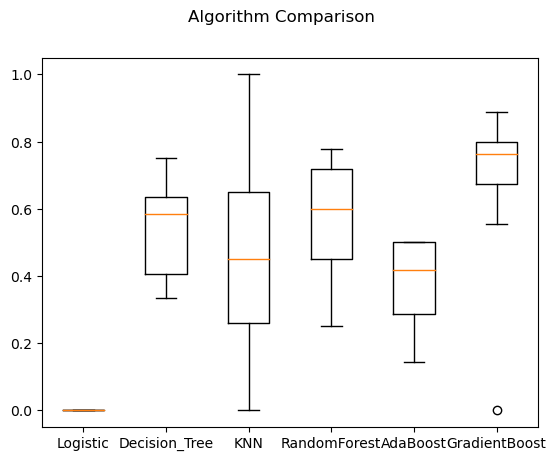

In [28]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring= Precision )
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
### Adaboost Model

In [30]:
## Standarding the Data
sc=StandardScaler()
X_std = sc.fit_transform(X)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_std,Y,test_size=0.3)

Logistic: 0.110000 (0.166333)


C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision_Tree: 0.528921 (0.142891)
KNN: 0.576786 (0.184150)
RandomForest: 0.627009 (0.155146)
AdaBoost: 0.401407 (0.170608)
GradientBoost: 0.688811 (0.223360)


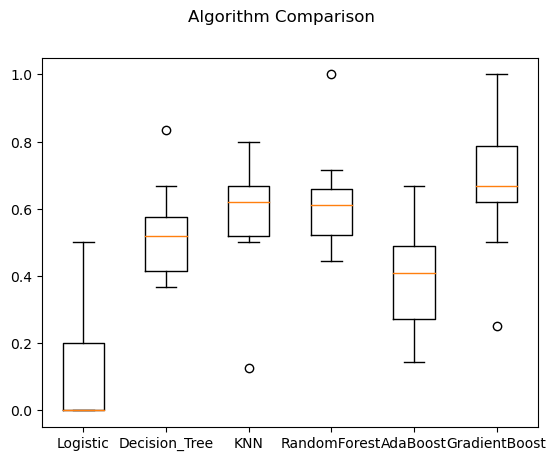

In [32]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring= Precision )
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
## Logistics Regression

In [34]:
##### Data Balancing

In [35]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

Text(0.5, 1.0, 'Outcome ytrain')

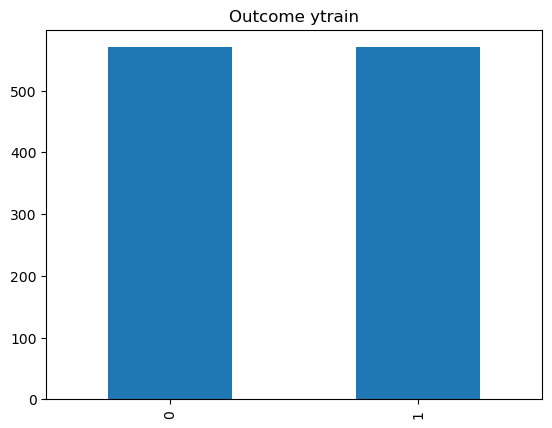

In [36]:
X_train_new, y_train_new = oversample.fit_resample(X_train, y_train.ravel())
class_balance = pd.Series(y_train_new).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain")

In [37]:
## MODELING 3

Logistic: 0.718668 (0.046036)
Decision_Tree: 0.872228 (0.058633)
KNN: 0.771448 (0.053716)
RandomForest: 0.869060 (0.048070)
AdaBoost: 0.745413 (0.053629)
GradientBoost: 0.827156 (0.071595)


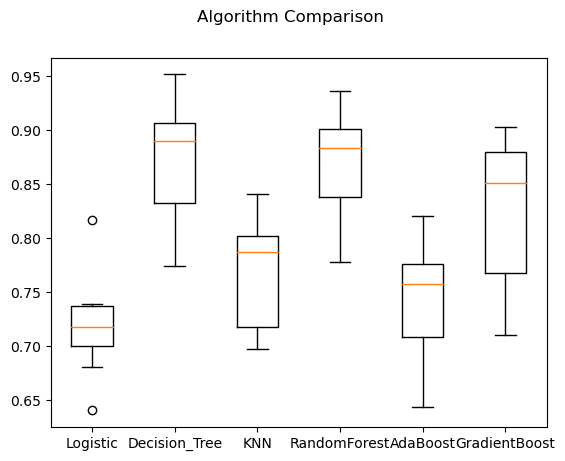

In [38]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train_new, y_train_new,cv=kfold, scoring= Precision )
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [39]:
## Logistic

# Comparing Between the models with hyperparameter tuning for each indiviual model

In [40]:
# Initialze the estimators
m0 = LogisticRegression()
m1 = DecisionTreeClassifier()
m2 = RandomForestClassifier()
m3 = KNeighborsClassifier()
m4 = GradientBoostingClassifier()
m5 = AdaBoostClassifier()
m6 = XGBClassifier()

In [41]:
Param0 =  { 'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'classifier__penalty': ['l1', 'l2', 'none'],
                      'classifier__C': [100, 10, 1.0, 0.1, 0.01],
                      'classifier__max_iter': [500000]
                     }

In [42]:
param1 = {}
param1['classifier__max_depth'] = [5,10,25,None]
param1['classifier__min_samples_split'] = [2,5,10]
param1['classifier'] = [m1]

In [43]:
param2 = {}
param2['classifier__n_estimators'] = [10, 50, 100]
param2['classifier__max_depth'] = [5, 10, 20]
param2['classifier'] = [m2]

In [44]:
param3 = {}
param3['classifier__n_neighbors'] = [1,2,3,4,5,6,7,8,9]
param3['classifier'] = [m3]             

In [45]:
param4 = {}
param4['classifier__n_estimators'] = [10, 50, 100]
param4['classifier__learning_rate'] =[0.1,0.05,0.02]
param4['classifier__max_depth'] = [5, 10]
param4['classifier'] = [m4]

In [46]:
param5 = {}
param5['classifier__n_estimators'] = [10, 50, 100, 250]
param5['classifier__learning_rate'] = [0.001, 0.01, 0.1, 1.0]
param5['classifier'] = [m5]

In [47]:
param6 = {
        'classifier__min_child_weight': [1, 5, 10],
        'classifier__gamma': [0.5, 1, 1.5, 2, 5],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__max_depth': [3, 4, 5],
        'classifier' : [m6]
        }

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pips = [Pipeline([('classifier', m0)]),Pipeline([('classifier', m1)]),Pipeline([('classifier', m2)]),Pipeline([('classifier', m3)]),Pipeline([('classifier', m4)]),
       Pipeline([('classifier', m5)])]
pars = [Param0 ,param1, param2, param3, param4, param5]

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
### using Precision as evaluation metric

In [52]:
print("starting Gridsearch")
for i in range(len(pars)):
    gs = GridSearchCV(pips[i], pars[i], cv=7 , n_jobs=-1, scoring = Precision )
    gs = gs.fit(X_train_new,y_train_new)
    print("finished Gridsearch")
    print(gs.best_score_)
    print(gs.best_params_)
    print("*"*125)

starting Gridsearch


C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_

finished Gridsearch
0.721694495702726
{'classifier__C': 10, 'classifier__max_iter': 500000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
*****************************************************************************************************************************
finished Gridsearch
0.8765084784886561
{'classifier': DecisionTreeClassifier(), 'classifier__max_depth': None, 'classifier__min_samples_split': 2}
*****************************************************************************************************************************
finished Gridsearch
0.8801686888545515
{'classifier': RandomForestClassifier(max_depth=20, n_estimators=10), 'classifier__max_depth': 20, 'classifier__n_estimators': 10}
*****************************************************************************************************************************
finished Gridsearch
0.8519750124159867
{'classifier': KNeighborsClassifier(n_neighbors=2), 'classifier__n_neighbors': 2}
****************************

In [53]:
print("starting Gridsearch")
for i in range(len(pars)):
    gs = GridSearchCV(pips[i], pars[i], cv=7 , n_jobs=-1)
    gs = gs.fit(X_train_new,y_train_new)
    print("finished Gridsearch")
    print(gs.best_score_)
    print(gs.best_params_)
    print("*"*125)

starting Gridsearch


C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_

finished Gridsearch
0.7571114789928696
{'classifier__C': 0.1, 'classifier__max_iter': 500000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
*****************************************************************************************************************************
finished Gridsearch
0.9210731327295746
{'classifier': DecisionTreeClassifier(max_depth=25), 'classifier__max_depth': 25, 'classifier__min_samples_split': 2}
*****************************************************************************************************************************
finished Gridsearch
0.9298481946743706
{'classifier': RandomForestClassifier(max_depth=20, n_estimators=10), 'classifier__max_depth': 20, 'classifier__n_estimators': 10}
*****************************************************************************************************************************
finished Gridsearch
0.8956676512913732
{'classifier': KNeighborsClassifier(n_neighbors=1), 'classifier__n_neighbors': 1}
*********************

In [54]:
print("starting Gridsearch")
for i in range(len(pars)):
    gs = GridSearchCV(pips[i], pars[i], cv=7 , n_jobs=-1, scoring = 'roc_auc' )
    gs = gs.fit(X_train_new,y_train_new)
    print("finished Gridsearch")
    print(gs.best_score_)
    print(gs.best_params_)
    print("*"*125)

starting Gridsearch


C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_

finished Gridsearch
0.790104471199523
{'classifier__C': 100, 'classifier__max_iter': 500000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
*****************************************************************************************************************************
finished Gridsearch
0.9267786843065374
{'classifier': DecisionTreeClassifier(max_depth=25, min_samples_split=5), 'classifier__max_depth': 25, 'classifier__min_samples_split': 5}
*****************************************************************************************************************************
finished Gridsearch
0.9906112935321005
{'classifier': RandomForestClassifier(max_depth=20), 'classifier__max_depth': 20, 'classifier__n_estimators': 100}
*****************************************************************************************************************************
finished Gridsearch
0.8989983839677708
{'classifier': KNeighborsClassifier(n_neighbors=2), 'classifier__n_neighbors': 2}
*****************

In [55]:
#### Feature selection 

In [56]:
import statsmodels.api as sm

In [57]:
logit_model=sm.Logit(y_train_new,X_train_new)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.577184
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.167     
Dependent Variable: y                AIC:              1331.9801 
Date:               2023-04-24 20:15 BIC:              1372.2903 
No. Observations:   1140             Log-Likelihood:   -657.99   
Df Model:           7                LL-Null:          -790.19   
Df Residuals:       1132             LLR p-value:      2.3821e-53
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -1.0391      0.1918    -5.4186    0.0000    -1.4150    -0.6633
x2    -0.7507      0.1847    -4.0640    0.0000    -1.1

The features with p-value less than 0.05 are considered to be the more relevant feature.

In [58]:
X.columns

Index(['CC', 'BFS', 'FA', 'WC', 'SPC', 'CA', 'FAC', 'Age'], dtype='object')

From the above we can see that Features
Age
SPC
Cement

In [60]:
# Creating Model only with only the features 

In [61]:
e= pd.DataFrame(X_train_new)

In [62]:
e.columns = X.columns

In [63]:
X_selected = e[['CC','SPC','Age']]

In [64]:
X_selected .head()

,CC,SPC,Age
0,0.582373,-1.039143,5.057677
1,-0.656431,0.702626,-0.501465
2,0.153483,0.551896,-0.279733
3,-0.509000,-1.039143,-0.279733
4,-0.853644,-1.039143,-0.279733


In [65]:
len(X_selected)

1140

In [66]:
len(y_train_new)

1140

In [67]:
print("starting Gridsearch")
for i in range(len(pars)):
    gs = GridSearchCV(pips[i], pars[i], cv=7 , n_jobs=-1, scoring = Precision )
    gs = gs.fit(X_selected,y_train_new)
    print("finished Gridsearch")
    print(gs.best_score_)
    print(gs.best_params_)
    print("*"*125)

starting Gridsearch


C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_

finished Gridsearch
0.7202364589930988
{'classifier__C': 0.1, 'classifier__max_iter': 500000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
*****************************************************************************************************************************
finished Gridsearch
0.8801497154764244
{'classifier': DecisionTreeClassifier(), 'classifier__max_depth': None, 'classifier__min_samples_split': 2}
*****************************************************************************************************************************
finished Gridsearch
0.8799455386358164
{'classifier': RandomForestClassifier(max_depth=20, n_estimators=10), 'classifier__max_depth': 20, 'classifier__n_estimators': 10}
*****************************************************************************************************************************
finished Gridsearch
0.8674977830916835
{'classifier': KNeighborsClassifier(n_neighbors=2), 'classifier__n_neighbors': 2}
*******************************

In [68]:
print("starting Gridsearch")
for i in range(len(pars)):
    gs = GridSearchCV(pips[i], pars[i], cv=7 , n_jobs=-1 )
    gs = gs.fit(X_selected,y_train_new)
    print("finished Gridsearch")
    print(gs.best_score_)
    print(gs.best_params_)
    print("*"*125)

starting Gridsearch


C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_

finished Gridsearch
0.7649722465673385
{'classifier__C': 0.1, 'classifier__max_iter': 500000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
*****************************************************************************************************************************
finished Gridsearch
0.9210731327295745
{'classifier': DecisionTreeClassifier(max_depth=25), 'classifier__max_depth': 25, 'classifier__min_samples_split': 2}
*****************************************************************************************************************************
finished Gridsearch
0.9236969952716373
{'classifier': RandomForestClassifier(max_depth=20, n_estimators=50), 'classifier__max_depth': 20, 'classifier__n_estimators': 50}
*****************************************************************************************************************************
finished Gridsearch
0.8930059185682907
{'classifier': KNeighborsClassifier(n_neighbors=1), 'classifier__n_neighbors': 1}
*********************

In [69]:
print("starting Gridsearch")
for i in range(len(pars)):
    gs = GridSearchCV(pips[i], pars[i], cv=7 , n_jobs=-1, scoring = 'roc_auc' )
    gs = gs.fit(X_selected,y_train_new)
    print("finished Gridsearch")
    print(gs.best_score_)
    print(gs.best_params_)
    print("*"*125)

starting Gridsearch


C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\aravinddudam\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_

finished Gridsearch
0.7692418296904897
{'classifier__C': 100, 'classifier__max_iter': 500000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
*****************************************************************************************************************************
finished Gridsearch
0.9367805058611042
{'classifier': DecisionTreeClassifier(min_samples_split=10), 'classifier__max_depth': None, 'classifier__min_samples_split': 10}
*****************************************************************************************************************************
finished Gridsearch
0.967614963725573
{'classifier': RandomForestClassifier(max_depth=20), 'classifier__max_depth': 20, 'classifier__n_estimators': 100}
*****************************************************************************************************************************
finished Gridsearch
0.9119627542542327
{'classifier': KNeighborsClassifier(n_neighbors=2), 'classifier__n_neighbors': 2}
**********************